# EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Load Distribution by Day of the Week

<ipython-input-8-442b069dd562>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


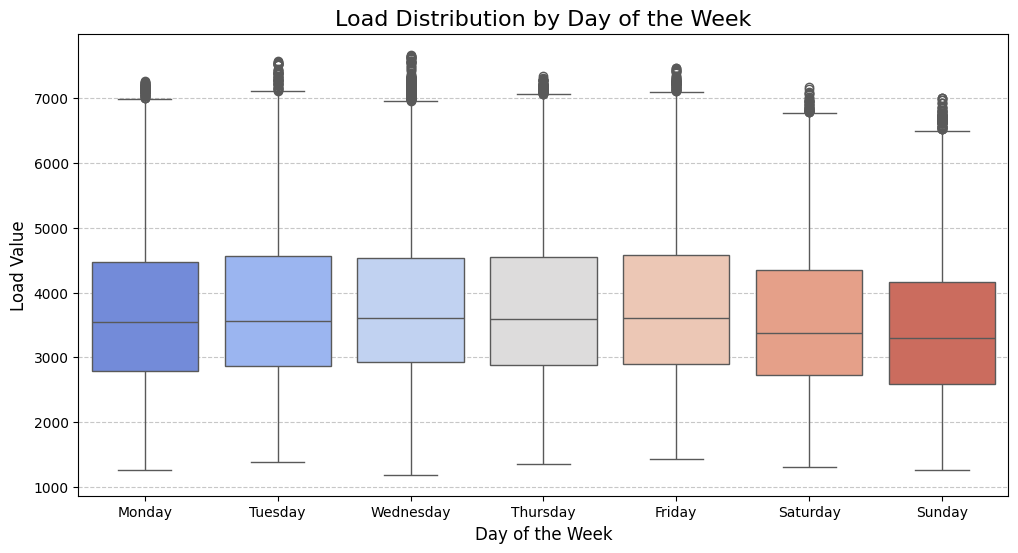

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ProjectBtech/DATAFINAL/dataset_2020_2022.csv')



df['DateTime'] = pd.to_datetime(df['DateTime'])

# Step 1: Extract the day of the week
df['DayOfWeek'] = df['DateTime'].dt.day_name()

# Step 2: Create the boxplot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.boxplot(
    x='DayOfWeek',
    y='Value',
    data=df,
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],  # Ensure correct order
    palette='coolwarm'  # Optional color palette
)

# Step 3: Customize the plot
plt.title('Load Distribution by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Load Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.show()


Load Distribution by Hour of the Day

<ipython-input-9-3499aff1845a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


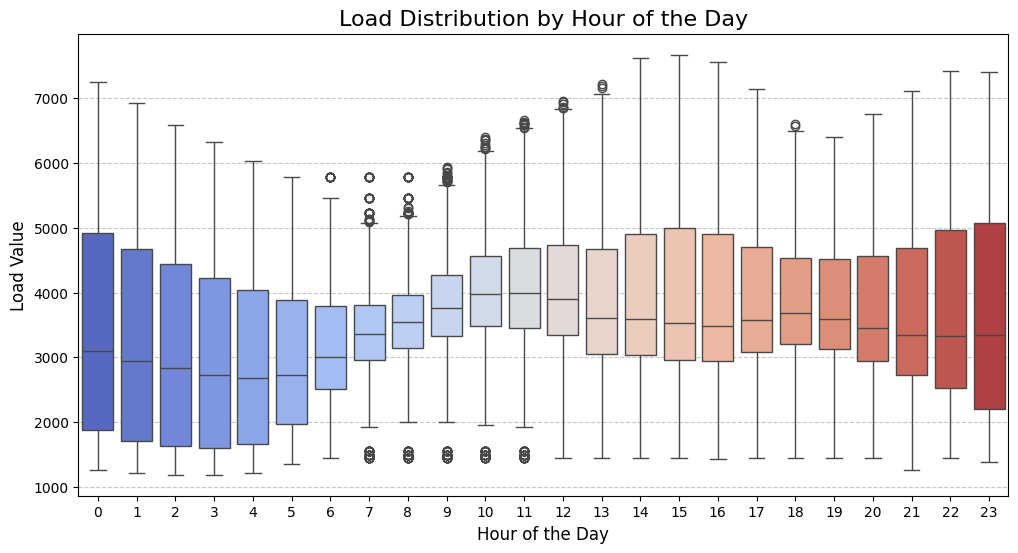

In [ ]:
df['Hour'] = df['DateTime'].dt.hour

# Step 2: Create the boxplot for hourly load
plt.figure(figsize=(12, 6))  # Set the figure size
sns.boxplot(
    x='Hour',
    y='Value',
    data=df,
    palette='coolwarm'  # Optional color palette
)

# Step 3: Customize the plot
plt.title('Load Distribution by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Load Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.show()

MONTHLY SEASONALITY HEAT MAP

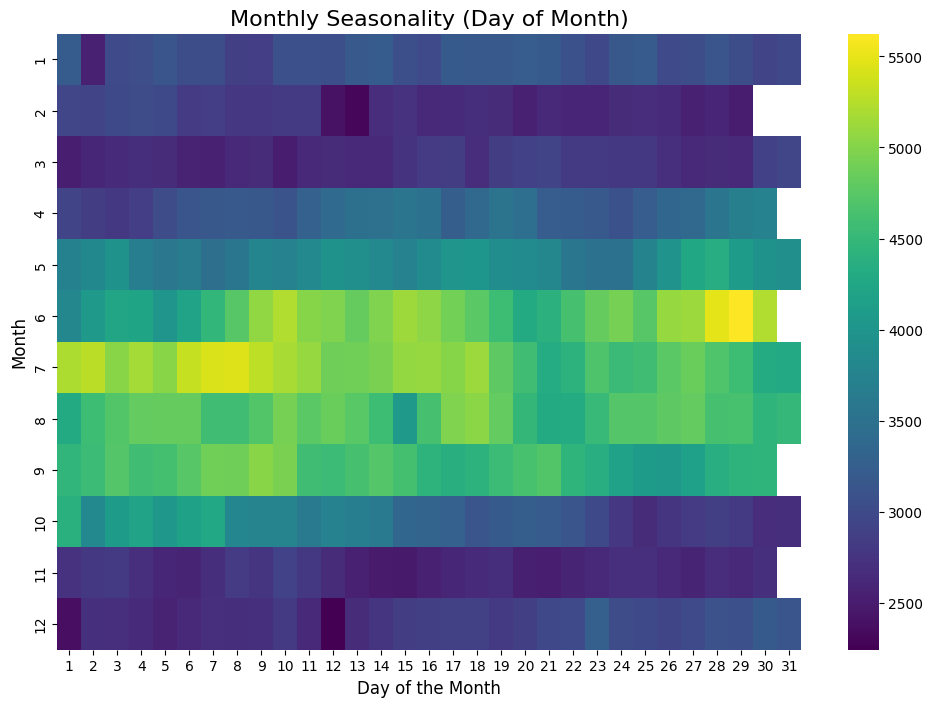

In [ ]:
df['Month'] = df['DateTime'].dt.month
monthly_data = df.groupby(['Month', df['DateTime'].dt.day])['Value'].mean().unstack()

# Heatmap for monthly seasonality
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_data, cmap='viridis', annot=False, fmt=".1f", cbar=True)
plt.title('Monthly Seasonality (Day of Month)', fontsize=16)
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.show()

MONTHLY SEASONALITY SIMPLE GRAPH

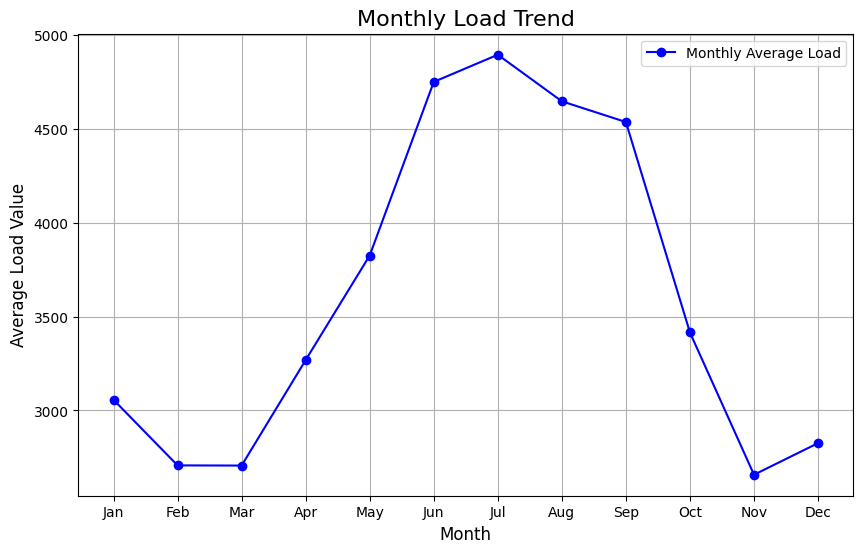

In [ ]:

# Aggregate data by month (mean load per month)
df['Month'] = df['DateTime'].dt.month
monthly_data = df.groupby('Month')['Value'].mean()

# Plot the monthly average load
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data.values, marker='o', linestyle='-', color='b', label='Monthly Average Load')
plt.title('Monthly Load Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Load Value', fontsize=12)
plt.xticks(monthly_data.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()
plt.show()

WHOLE DATAST PLOT

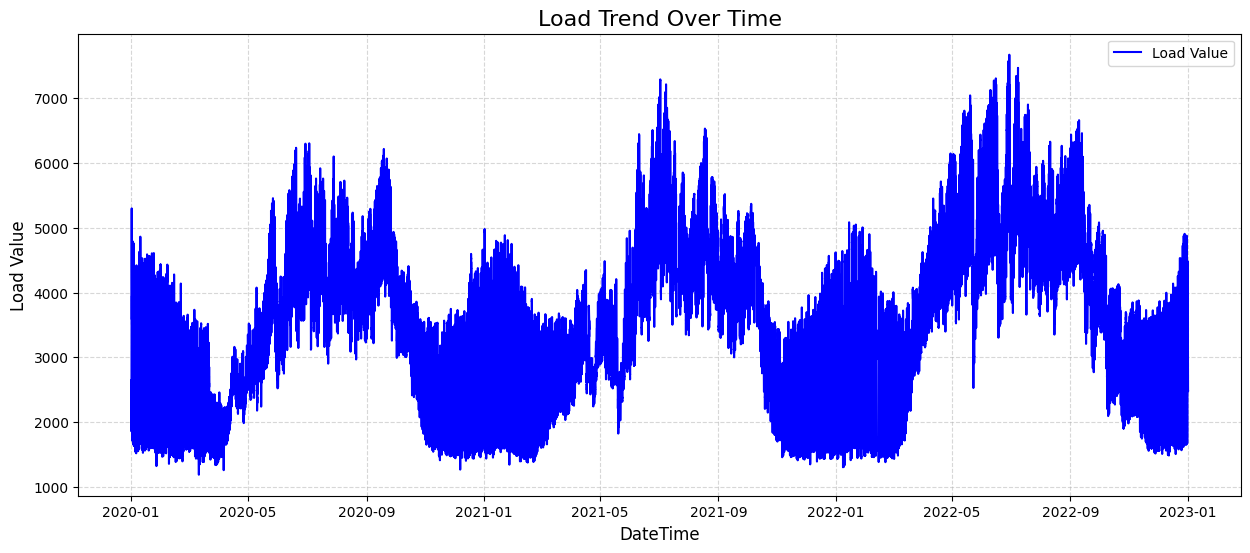

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Plot the entire dataset (load over time)
plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df['Value'], label='Load Value', color='blue')
plt.title('Load Trend Over Time', fontsize=16)
plt.xlabel('DateTime', fontsize=12)
plt.ylabel('Load Value', fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.show()


Load Trend for 2020, 2021, and 2022 SEPERATELY

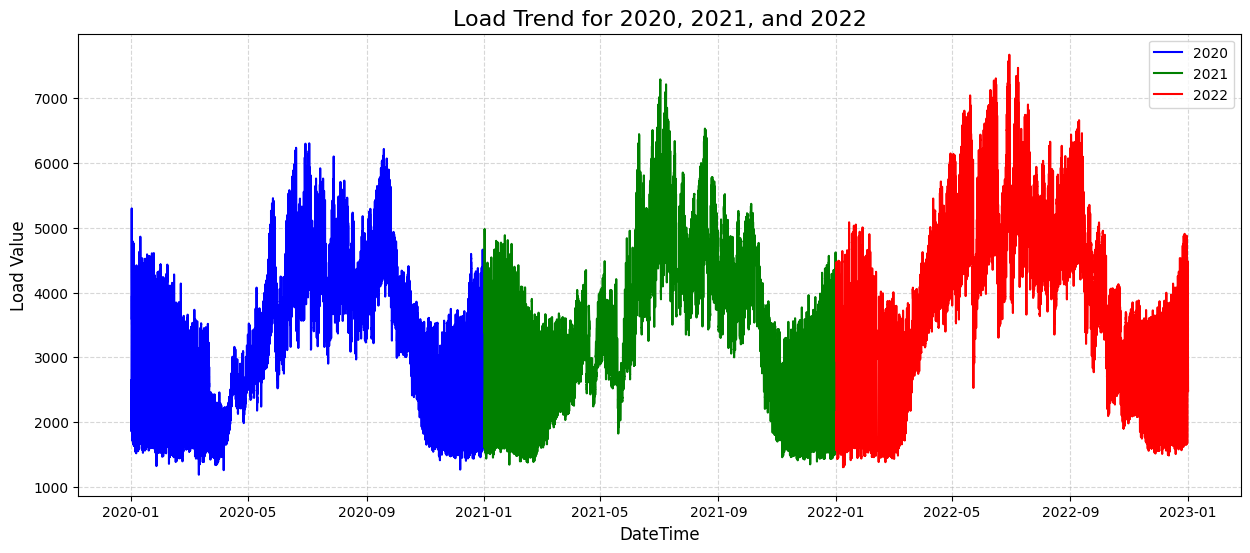

In [ ]:
# Ensure the 'DateTime' column is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Filter data for each year
df_2020 = df[df['DateTime'].dt.year == 2020]
df_2021 = df[df['DateTime'].dt.year == 2021]
df_2022 = df[df['DateTime'].dt.year == 2022]

# Plot the data for each year with different colors
plt.figure(figsize=(15, 6))
plt.plot(df_2020['DateTime'], df_2020['Value'], label='2020', color='blue')
plt.plot(df_2021['DateTime'], df_2021['Value'], label='2021', color='green')
plt.plot(df_2022['DateTime'], df_2022['Value'], label='2022', color='red')

# Customize the plot
plt.title('Load Trend for 2020, 2021, and 2022', fontsize=16)
plt.xlabel('DateTime', fontsize=12)
plt.ylabel('Load Value', fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()

# Show the plot
plt.show()




Load vs Temperature

<ipython-input-23-38ac8fcc291e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Temp_Binned', y='Value', data=df, palette='coolwarm')


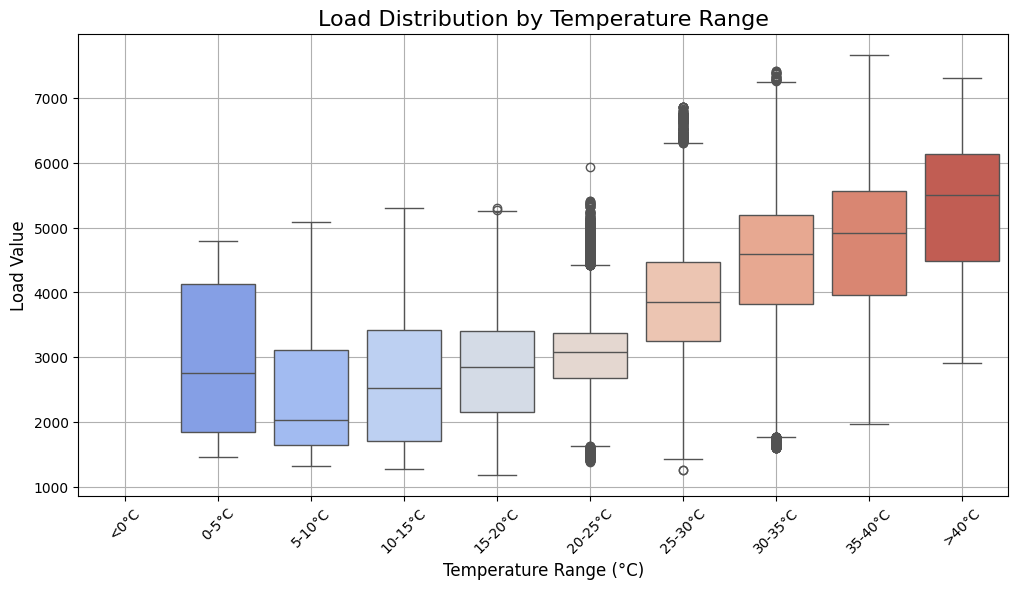

In [ ]:
# Ensure the 'DateTime' column is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Step 1: Create temperature bins
temperature_bins = [-float('inf'), 0, 5, 10, 15, 20, 25, 30, 35, 40, float('inf')]  # You can adjust the bins as per your data
temperature_labels = ['<0°C', '0-5°C', '5-10°C', '10-15°C', '15-20°C', '20-25°C', '25-30°C', '30-35°C', '35-40°C', '>40°C']

# Step 2: Bin the temperature data
df['Temp_Binned'] = pd.cut(df['Temperature (°C)'], bins=temperature_bins, labels=temperature_labels)

# Step 3: Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Temp_Binned', y='Value', data=df, palette='coolwarm')

# Step 4: Customize the plot
plt.title('Load Distribution by Temperature Range', fontsize=16)
plt.xlabel('Temperature Range (°C)', fontsize=12)
plt.ylabel('Load Value', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Step 5: Show the plot
plt.show()

